In [22]:
import os
import pandas as pd
# Example usage:
directory_path = "C:/Users/subra/OneDrive/Desktop/copies/images"
output_file_path = 'C:/Users/subra/OneDrive/Desktop/copies/output_image.txt'
folders_name=[]
image_name=[]
#with open(output_file_path, 'w') as file:
for root, dirs, files in os.walk(directory_path):
    for file_name in files:
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    #print(file_name)
            folder_name = os.path.basename(root)
            image_path = os.path.join(root, file_name)
                #file.write(f"{folder_name} {file_name}\n")
            folders_name.append(folder_name)
            image_name.append(image_path)
    
with open("C:/Users/subra/OneDrive/Desktop/copies/labels.txt", 'r') as file:
    # Read the lines from the file
    lines = file.readlines()
    words=[]
    for i in range(0,len(lines)):
        #print(lines[i])
        words.append(lines[i].split(","))
#print(len(words[0]))
    new_words=[]
    for i in range(0,len(words[0])):
        p=words[0][i].lstrip("'")
        p1=p.rstrip("'")
        new_words.append(p1)
#print(len(new_words))

# Strip newline characters and create a list
elements = [line.strip() for line in new_words]
    #print(update_sentence)
#print(f"Text file with image names and handwritten text generated successfully at {output_file_path}")
#print(image_name)
import re

# Define a custom sorting 0key function
def get_numeric_part(file_name):
    match = re.search(r'\d+', file_name)
    return int(match.group()) if match else 0

# Sort the list based on the numeric part
sorted_file_names = sorted(image_name, key=get_numeric_part)
df = pd.DataFrame(sorted_file_names, columns=['Image_path'])
df['Labels']=elements
df.to_csv('C:/Users/subra/OneDrive/Desktop/copies/output_image.csv', index=False)
df1 = pd.read_csv('C:/Users/subra/OneDrive/Desktop/copies/output_image.csv')
#df.to_csv(output_file_path, header=False, index=False, sep='\t')
df1.to_csv('C:/Users/subra/OneDrive/Desktop/copies/output_image.txt', header=False, sep='\t', index=False)


In [61]:
new_elements=[]
def replace_word_by_index(sentence):
    words = sentence.split()
    for i in range(len(words)):
        if words[i].startswith('T.') or words[i].startswith('Tab.') or words[i].startswith('tab.') or words[i].startswith('t.'):
            words[i]='Tablet'
        elif words[i].startswith('Cap.') or words[i].startswith('cap.') or words[i].startswith('C.') or words[i].startswith('c.'):
            words[i]='Capsule'
        elif words[i].startswith('Syr.') or words[i].startswith('syr.') or words[i].startswith('Syrp.') or words[i].startswith('Syp.') or words[i].startswith('syp.'):
            words[i]='Syrup'
        elif words[i].startswith('Inj.') or words[i].startswith('inj.') :
            words[i]='Injection'
    new_sentence=' '.join(words)
    return new_sentence
for i in range(0,len(elements)):
    update_sentence = replace_word_by_index(elements[i])
    new_elements.append(update_sentence)

In [23]:
from tensorflow.keras.layers import StringLookup
from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

In [24]:
base_path = "C:/Users/subra/OneDrive/Desktop/copies"
words_list = []

words = open(f"{base_path}/output_image.txt", "r").readlines()
for line in words:
    #print(line.split(" "))
    if line[0] == "#":
        continue
    if line.split(" ")!= "err":  # We don't need to deal with errored entries.
        words_list.append(line)

len(words_list)

np.random.shuffle(words_list)

In [25]:
split_idx = int(0.9 * len(words_list))
train_samples = words_list[:split_idx]
test_samples = words_list[split_idx:]

val_split_idx = int(0.5 * len(test_samples))
validation_samples = test_samples[:val_split_idx]
test_samples = test_samples[val_split_idx:]

assert len(words_list) == len(train_samples) + len(validation_samples) + len(
    test_samples
)

print(f"Total training samples: {len(train_samples)}")
print(f"Total validation samples: {len(validation_samples)}")
print(f"Total test samples: {len(test_samples)}")

Total training samples: 3162
Total validation samples: 176
Total test samples: 176


In [26]:
base_image_path = base_path


def get_image_paths_and_labels(samples):
    paths = []
    corrected_samples = []
    for (i, file_line) in enumerate(samples):
        line_split = file_line.strip()
        line_split = line_split.split("\t")
        #print(line_split)
        image_name = line_split[0]
        img_path = os.path.join(
            base_image_path, image_name
        )
        if os.path.getsize(img_path):
            paths.append(img_path)
            corrected_samples.append(line_split[1])
    #print(paths)
    #print(corrected_samples)
    return paths, corrected_samples


train_img_paths, train_labels = get_image_paths_and_labels(train_samples)
validation_img_paths, validation_labels = get_image_paths_and_labels(validation_samples)
test_img_paths, test_labels = get_image_paths_and_labels(test_samples)

In [20]:
print(test_img_paths)

['C:/Users/subra/OneDrive/Desktop/copies/images\\p_2532.png', 'C:/Users/subra/OneDrive/Desktop/copies/images\\p_1757.png', 'C:/Users/subra/OneDrive/Desktop/copies/images\\p_1923.png', 'C:/Users/subra/OneDrive/Desktop/copies/images\\p_95.jpg', 'C:/Users/subra/OneDrive/Desktop/copies/images\\p_1020.png', 'C:/Users/subra/OneDrive/Desktop/copies/images\\p_563.png', 'C:/Users/subra/OneDrive/Desktop/copies/images\\p_3312.png', 'C:/Users/subra/OneDrive/Desktop/copies/images\\p_2790.png', 'C:/Users/subra/OneDrive/Desktop/copies/images\\p_863.png', 'C:/Users/subra/OneDrive/Desktop/copies/images\\p_1484.png', 'C:/Users/subra/OneDrive/Desktop/copies/images\\p_2939.png', 'C:/Users/subra/OneDrive/Desktop/copies/images\\p_1881.png', 'C:/Users/subra/OneDrive/Desktop/copies/images\\p_1038.png', 'C:/Users/subra/OneDrive/Desktop/copies/images\\p_206.jpg', 'C:/Users/subra/OneDrive/Desktop/copies/images\\p_392.png', 'C:/Users/subra/OneDrive/Desktop/copies/images\\p_2842.png', 'C:/Users/subra/OneDrive/Desk

In [27]:
# Find maximum length and the size of the vocabulary in the training data.
train_labels_cleaned = []
characters = set()
max_len = 0

for label in train_labels:
    #print(label)
    #label = label.split(" ")[-1].strip()
    for char in label:
        characters.add(char)

    max_len = max(max_len, len(label))
    train_labels_cleaned.append(label)

characters = sorted(list(characters))

print("Maximum length: ", max_len)
print("Vocab size: ", len(characters))

# Check some label samples.
train_labels_cleaned[:10]

Maximum length:  30
Vocab size:  71


['T. Zitamet Plus (20/1000)',
 'Uprise-D3 (60K)',
 'Tab. Amlosafe',
 'T. Dytor (5)',
 'inj. Xone',
 'inj. -Nurokind',
 'T. Stamlo(5)',
 'T. Xafinact (50)',
 'Toxoid',
 'inj. - Clampose']

In [28]:
# Find maximum length and the size of the vocabulary in the training data.
test_labels_cleaned = []
characters = set()
max_len = 0

for label in test_labels:
    #print(label)
    #label = label.split(" ")[-1].strip()
    for char in label:
        characters.add(char)

    max_len = max(max_len, len(label))
    test_labels_cleaned.append(label)

characters = sorted(list(characters))

print("Maximum length: ", max_len)
print("Vocab size: ", len(characters))

# Check some label samples.
test_labels_cleaned[:10]

Maximum length:  31
Vocab size:  62


['Inj. Ceprolyst',
 'T. Somadine',
 'Inj. Eptoin (100 mg)',
 'Pipcon-D',
 'Inj. Knat',
 'Syr. Polybion-L 5 ml',
 'Inj. ondem',
 'Inj. Rantac',
 'Inj. Decdan',
 'T. - Panfer-D']

In [29]:
def clean_labels(labels):
    cleaned_labels = []
    for label in labels:
        #label = label.split(" ")[-1].strip()
        cleaned_labels.append(label)
    return cleaned_labels


validation_labels_cleaned = clean_labels(validation_labels)
test_labels_cleaned = clean_labels(test_labels)

In [30]:
AUTOTUNE = tf.data.AUTOTUNE

# Mapping characters to integers.
char_to_num = StringLookup(vocabulary=list(characters), mask_token=None)

# Mapping integers back to original characters.
num_to_char = StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

In [31]:
def distortion_free_resize(image, img_size):
    w, h = img_size
    image = tf.image.resize(image, size=(h, w), preserve_aspect_ratio=True)

    # Check tha amount of padding needed to be done.
    pad_height = h - tf.shape(image)[0]
    pad_width = w - tf.shape(image)[1]

    # Only necessary if you want to do same amount of padding on both sides.
    if pad_height % 2 != 0:
        height = pad_height // 2
        pad_height_top = height + 1
        pad_height_bottom = height
    else:
        pad_height_top = pad_height_bottom = pad_height // 2

    if pad_width % 2 != 0:
        width = pad_width // 2
        pad_width_left = width + 1
        pad_width_right = width
    else:
        pad_width_left = pad_width_right = pad_width // 2

    image = tf.pad(
        image,
        paddings=[
            [pad_height_top, pad_height_bottom],
            [pad_width_left, pad_width_right],
            [0, 0],
        ],
    )

    image = tf.transpose(image, perm=[1, 0, 2])
    image = tf.image.flip_left_right(image)
    return image

In [32]:
batch_size = 64
padding_token = 99
image_width = 128
image_height = 32


def preprocess_image(image_path, img_size=(image_width, image_height)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, 1)
    image = distortion_free_resize(image, img_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image


def vectorize_label(label):
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    length = tf.shape(label)[0]
    pad_amount = max_len - length
    label = tf.pad(label, paddings=[[0, pad_amount]], constant_values=padding_token)
    return label


def process_images_labels(image_path, label):
    image = preprocess_image(image_path)
    label = vectorize_label(label)
    return {"image": image, "label": label}


def prepare_dataset(image_paths, labels):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels)).map(
        process_images_labels, num_parallel_calls=AUTOTUNE
    )
    return dataset.batch(batch_size).cache().prefetch(AUTOTUNE)

In [33]:
train_ds = prepare_dataset(train_img_paths, train_labels_cleaned)
validation_ds = prepare_dataset(validation_img_paths, validation_labels_cleaned)
test_ds = prepare_dataset(test_img_paths, test_labels_cleaned)

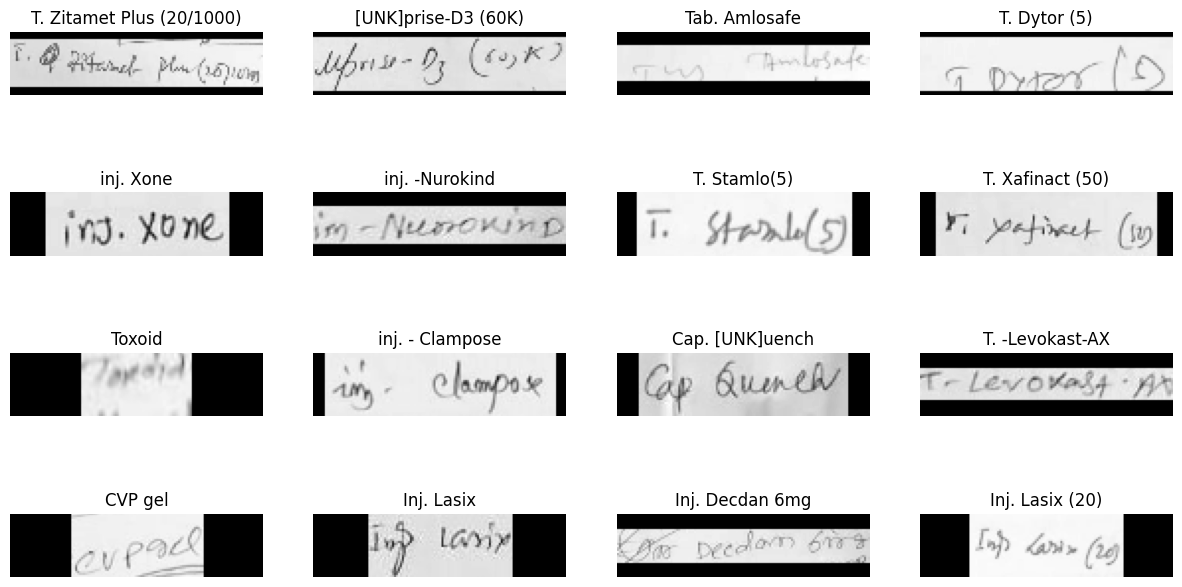

In [34]:
for data in train_ds.take(1):
    images, labels = data["image"], data["label"]

    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    for i in range(16):
        img = images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        # Gather indices where label!= padding_token.
        label = labels[i]
        indices = tf.gather(label, tf.where(tf.math.not_equal(label, padding_token)))
        # Convert to string.
        label = tf.strings.reduce_join(num_to_char(indices))
        label = label.numpy().decode("utf-8")

        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")


plt.show()

In [35]:
class CTCLayer(keras.layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions.
        return y_pred


def build_model():
    # Inputs to the model
    input_img = keras.Input(shape=(image_width, image_height, 1), name="image")
    labels = keras.layers.Input(name="label", shape=(None,))

    # First conv block.
    x = keras.layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = keras.layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block.
    x = keras.layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = keras.layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model.
    new_shape = ((image_width // 4), (image_height // 4) * 64)
    x = keras.layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = keras.layers.Dense(64, activation="relu", name="dense1")(x)
    x = keras.layers.Dropout(0.2)(x)

    # RNNs.
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(128, return_sequences=True, dropout=0.25)
    )(x)
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(64, return_sequences=True, dropout=0.25)
    )(x)

    # +2 is to account for the two special tokens introduced by the CTC loss.
    # The recommendation comes here: https://git.io/J0eXP.
    x = keras.layers.Dense(
        len(char_to_num.get_vocabulary()) + 2, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step.
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model.
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="handwriting_recognizer"
    )
    # Optimizer.
    opt = keras.optimizers.Adam()
    # Compile the model and return.
    model.compile(optimizer=opt)
    return model


# Get the model.
model = build_model()
model.summary()

Model: "handwriting_recognizer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image (InputLayer)          [(None, 128, 32, 1)]         0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 128, 32, 32)          320       ['image[0][0]']               
                                                                                                  
 pool1 (MaxPooling2D)        (None, 64, 16, 32)           0         ['Conv1[0][0]']               
                                                                                                  
 Conv2 (Conv2D)              (None, 64, 16, 64)           18496     ['pool1[0][0]']               
                                                                             

In [36]:
validation_images = []
validation_labels = []

for batch in validation_ds:
    validation_images.append(batch["image"])
    validation_labels.append(batch["label"])

In [37]:
def calculate_edit_distance(labels, predictions):
    # Get a single batch and convert its labels to sparse tensors.
    saprse_labels = tf.cast(tf.sparse.from_dense(labels), dtype=tf.int64)

    # Make predictions and convert them to sparse tensors.
    input_len = np.ones(predictions.shape[0]) * predictions.shape[1]
    predictions_decoded = keras.backend.ctc_decode(
        predictions, input_length=input_len, greedy=True
    )[0][0][:, :max_len]
    sparse_predictions = tf.cast(
        tf.sparse.from_dense(predictions_decoded), dtype=tf.int64
    )

    # Compute individual edit distances and average them out.
    edit_distances = tf.edit_distance(
        sparse_predictions, saprse_labels, normalize=False
    )
    return tf.reduce_mean(edit_distances)


class EditDistanceCallback(keras.callbacks.Callback):
    def __init__(self, pred_model):
        super().__init__()
        self.prediction_model = pred_model

    def on_epoch_end(self, epoch, logs=None):
        edit_distances = []

        for i in range(len(validation_images)):
            labels = validation_labels[i]
            predictions = self.prediction_model.predict(validation_images[i])
            edit_distances.append(calculate_edit_distance(labels, predictions).numpy())

        print(
            f"Mean edit distance for epoch {epoch + 1}: {np.mean(edit_distances):.4f}"
        )

In [17]:
epochs = 100  # To get good results this should be at least 50.

model = build_model()
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
edit_distance_callback = EditDistanceCallback(prediction_model)

# Train the model.
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=epochs,
    callbacks=[edit_distance_callback],
)

Epoch 1/100
2/2 [==============================] - 2s 20ms/step
Mean edit distance for epoch 1: 31.0000
50/50 [==============================] - 24s 323ms/step - loss: 55.2135 - val_loss: 46.4143
Epoch 2/100
2/2 [==============================] - 0s 16ms/step
Mean edit distance for epoch 2: 30.5816
50/50 [==============================] - 11s 215ms/step - loss: 45.6640 - val_loss: 42.8839
Epoch 3/100
2/2 [==============================] - 0s 21ms/step
Mean edit distance for epoch 3: 30.2188
50/50 [==============================] - 11s 221ms/step - loss: 43.0217 - val_loss: 40.7572
Epoch 4/100
2/2 [==============================] - 0s 23ms/step
Mean edit distance for epoch 4: 29.7691
50/50 [==============================] - 11s 225ms/step - loss: 41.2791 - val_loss: 39.3541
Epoch 5/100
2/2 [==============================] - 0s 22ms/step
Mean edit distance for epoch 5: 29.1441
50/50 [==============================] - 12s 231ms/step - loss: 39.9627 - val_loss: 38.2705
Epoch 6/100
2/2 [===

2/2 [==============================] - 0s 31ms/step


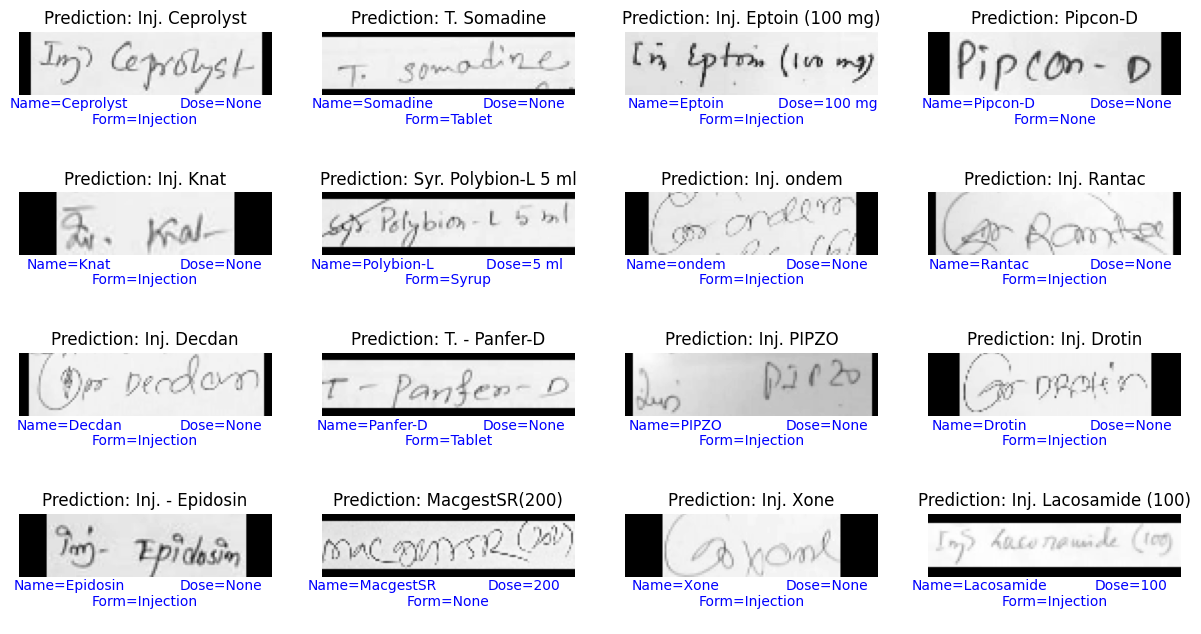

In [50]:
import re
def extract_medicine_strength(title):
    match = re.search(r'(\d+(?:gm|mg| mg|g| ml|ML|))', title, flags=re.IGNORECASE)
    match1 = re.search(r'(\d+(?:\.\d+)?)', title, flags=re.IGNORECASE)
    if match:
        strength = match.group(1)
        return strength
    elif match1:
        strength=match1.group(1)
        return strength
    else:
        return None
def extract_medicine_info(title):
    if "- " in title:  # Handling the case when medicine name is after hyphen
        parts = title.split("- ")
        medicine_name = parts[-1].strip()
        return medicine_name, None
    # Define a regular expression to match and capture the medicine name and strength
    match2 = re.search(r'(?:T\.|Inj\.)\s*([^(\d]+)\s*\(([^)]+)\)', title)
    match3 = re.search(r'(?:T\.|Inj\.|inj\. ->|inj\.|Syp\.|Syr\.)\s*([^(\d]+)\s*(?:\(\s*(\d+(?:\.\d+)?)\s*(?:gm|mg|g|ml|ML)\s*\))?', title)
    match5= re. search(r'Prediction:\s*([^(\d]+)\s*', title)
    match6=re.search(r'Syr\.\s*([^(\s]+)\s*', title)
    match4=re.search(r'T\.-\s*([^(\s]+)\s*', title)
    match7=re.search(r'Inj\.-\s*([^(\s]+)\s*', title)
    
    if match2:
        medicine_name = match2.group(1).strip()
        medicine_strength = match2.group(2).strip()
        return medicine_name, medicine_strength
    elif match3:
        medicine_name = match3.group(1).strip()
        medicine_strength = match3.group(2).strip() if match3.group(2) else None
        return medicine_name, medicine_strength
    elif match6:
        medicine_name = match5.group(1).strip()
        return medicine_name, None
    elif match4:
        medicine_name = match4.group(1).strip()
        return medicine_name, None
    elif match7:
        medicine_name = match7.group(1).strip()
        return medicine_name, None
    else:
        medicine_name=match5.group(1)
        return medicine_name, None
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search.
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_len
    ]
    # Iterate over the results and get back the text.
    output_text = []
    for res in results:
        res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text

# Let's check results on some test samples.
for batch in test_ds.take(1):
    batch_images = batch["image"]
    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    for i in range(16):
        img = batch_images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        title = f"Prediction: {test_labels[i]}"
        medicine_name, medicine_strength = extract_medicine_info(title)
        medicine_strength_new=extract_medicine_strength(title)

        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
        # Display additional text below the image only if "Inj" is in the title
        if "Inj." in title or "inj." in title:
            ax[i // 4, i % 4].text(0.5, -0.7, "Form=Injection\n", transform=ax[i // 4, i % 4].transAxes,
                                   fontsize=10, ha='center', color='blue')
        elif "T." in title:
            ax[i // 4, i % 4].text(0.5, -0.7, "Form=Tablet\n", transform=ax[i // 4, i % 4].transAxes,
                                   fontsize=10, ha='center', color='blue')
        elif "oint" in title:

            ax[i // 4, i % 4].text(0.5, -0.7, "Form=Ointment\n", transform=ax[i // 4, i % 4].transAxes,
                                   fontsize=10, ha='center', color='blue')
        elif "Syp." in title or "Srp." in title or "Syr." in title:
            ax[i // 4, i % 4].text(0.5, -0.7, "Form=Syrup\n", transform=ax[i // 4, i % 4].transAxes,
                                   fontsize=10, ha='center', color='blue')
        else:
            ax[i // 4, i % 4].text(0.5, -0.7, "Form=None\n", transform=ax[i // 4, i % 4].transAxes,
                                   fontsize=10, ha='center', color='blue')
        ax[i // 4, i % 4].text(0.8, -0.2, f"Dose={medicine_strength_new}", transform=ax[i // 4, i % 4].transAxes,
                                   fontsize=10, ha='center', color='blue')
        ax[i // 4, i % 4].text(0.2, -0.2, f"Name={medicine_name}", transform=ax[i // 4, i % 4].transAxes,
                                   fontsize=10, ha='center', color='blue')
plt.show()